In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Overview

### We are going to do some exploratory analysis, such as looking at the most used words by Trump and Clinton ...

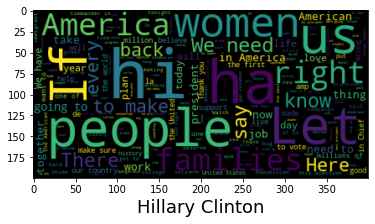

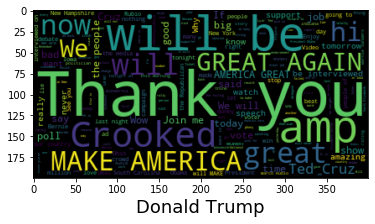

<IPython.core.display.Javascript object>

In [212]:
plt.imshow(wordcloud_clinton, interpolation="bilinear")
plt.xlabel("Hillary Clinton", fontsize=18)
plt.show()

plt.imshow(wordcloud_trump, interpolation="bilinear")
plt.xlabel("Donald Trump", fontsize=18)
plt.show()

the most used emojis...

In [214]:
{
    "Donald Trump": extract_most_common_emojis(original_tweets["realDonaldTrump"]),
    "Hillary Clinton": extract_most_common_emojis(original_tweets["HillaryClinton"]),
}

{'Donald Trump': [('❌', 7),
  ('🇺🇸', 7),
  ('✅', 5),
  ('👏', 3),
  ('🚂', 2),
  ('👿', 1),
  ('👍', 1),
  ('🗽', 1),
  ('👍🏻', 1),
  ('❤', 1)],
 'Hillary Clinton': [('👈', 8),
  ('✔', 3),
  ('🎧', 2),
  ('🎤', 1),
  ('👀', 1),
  ('👉', 1)]}

<IPython.core.display.Javascript object>

and averaged favourites and retweets for each tweet of both people ...

In [215]:
tweets[-tweets.is_retweet][["retweet_count", "favorite_count"]].groupby(
    tweets.handle
).mean()

,retweet_count,favorite_count
handle,,
HillaryClinton,3098.507037,7012.572841
realDonaldTrump,5849.742321,16838.851277


<IPython.core.display.Javascript object>

### We are also going to use gensim package to do a little topic modeling with LDA (Latent Dirichlet Allocation) ...

In [238]:
top_topics = model.top_topics(corpus, topn=10)
for i in range(6):
    pprint(top_topics[i])

([(0.01282344, 'woman'),
  (0.01136708, 'her'),
  (0.010445317, 'am'),
  (0.010442935, 'should'),
  (0.010215069, 'many'),
  (0.0095406175, 'i_am'),
  (0.009274806, 'she'),
  (0.009093469, 'only'),
  (0.008282347, 'than'),
  (0.0079812, 'but')],
 -3.3034009654196077)
([(0.02778302, 'iowa'),
  (0.024728598, 'i_will'),
  (0.024082938, 'will_be'),
  (0.021891944, 'tonight'),
  (0.016447898, 'crowd'),
  (0.01548726, 'night'),
  (0.014579794, 'big'),
  (0.013023069, 'join'),
  (0.012703152, 'now'),
  (0.012153019, 'enjoy')],
 -4.41154278682534)
([(0.027403831, 'cruz'),
  (0.019137308, 'poll'),
  (0.016647121, 'ted'),
  (0.014061736, 'again'),
  (0.011882738, 'ted_cruz'),
  (0.011626618, 'want'),
  (0.011195653, 'vote'),
  (0.0103899455, 'make_america'),
  (0.01007531, 'great_again'),
  (0.009751498, 'like')],
 -5.58663580830123)
([(0.024973448, 'let'),
  (0.014374421, 'don'),
  (0.013057018, 'don_t'),
  (0.011749552, 'obama'),
  (0.010728721, 'together'),
  (0.0101790745, 'let_s'),
  (0.007

<IPython.core.display.Javascript object>

In [256]:
# model()
doc_trump = remove_urls(" ".join(tweets[tweets.handle == "realDonaldTrump"].text[:5]))
corpus_trump = dictionary.doc2bow(doc_trump.lower().split())
print("Text:", doc_trump, "belongs to these topics:")
model[corpus_trump]

Text: Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:…  Once again, we will have a government of, by and for the people. Join the MOVEMENT today!   On National #VoterRegistrationDay, make sure you're registered to vote so we can #MakeAmericaGreatAgain…  Hillary Clinton's Campaign Continues To Make False Claims About Foundation Disclosure: 
 'CNBC, Time magazine online polls say Donald Trump won the first presidential debate' via @WashTimes. #MAGA
 belongs to these topics:


[(1, 0.34699166), (2, 0.2708639), (5, 0.36067218)]

<IPython.core.display.Javascript object>

### We will also use pre-trained NLP models from transformers library to do some question answering, text generation and summarization ...

Question anwering ...

In [24]:
print("Question: How to make America great again?")
context = remove_urls(original_tweets["HillaryClinton"])[:1000]
pprint(
    "Hillary Clinton: "
    + nlp(question="How to make America great again?", context=context)["answer"]
)
context = remove_urls(original_tweets["realDonaldTrump"])[:1000]
pprint(
    "Donald Trump: "
    + nlp(question="How to make America great again?", context=context)["answer"]
)

Question: How to make America great again?
"Hillary Clinton: If we stand together, there's nothing we can't do."
'Donald Trump: Once again, we will have a government of, by and for the people.'


<IPython.core.display.Javascript object>

Text generation ...

In [27]:
print("Prompt: 'If I am elected president of the United States, I would '")
pprint(
    "Hillary Clinton: "
    + tokenizer.decode(outputs[0])[
        re.search(prompt, tokenizer.decode(outputs[0])).span(0)[0] :
    ]
)

Prompt: 'If I am elected president of the United States, I would '
('Hillary Clinton: If I am elected president of the United States, I would be '
 'a major proponent of environmental policy. I would also be a major advocate '
 'of civil rights and justice for the workers in the United States and '
 'international business and trade leaders. I would also be a major advocate '
 'of our economic and social policies and the economic impact of immigration '
 'in our country')


<IPython.core.display.Javascript object>

In [31]:
print("Prompt: 'If I am elected president of the United States, I would '")
pprint(
    "Donald Trump: "
    + tokenizer.decode(outputs[0])[
        re.search(prompt, tokenizer.decode(outputs[0])).span(0)[0] :
    ]
)

Prompt: 'If I am elected president of the United States, I would '
('Donald Trump: If I am elected president of the United States, I would not '
 'choose to hold a referendum for the Constitution. I would choose to call a '
 'referendum on the Constitution. But')


<IPython.core.display.Javascript object>

# Introduction

The dataset is ...

The analysis is ...

# Exploring the dataset

In [2]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")

<IPython.core.display.Javascript object>

In [3]:
tweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


<IPython.core.display.Javascript object>

### Let's see some tweets.

In [4]:
# from HillaryClinton
pd.set_option("display.max_colwidth", 3000)
tweets[tweets.handle == "HillaryClinton"].text.sample(n=5)

2790                              “Let’s take real, meaningful action to end the epidemic of gun violence in America.” —Hillary
3460                                      We just won Washington, D.C.! Grateful to everyone who voted. https://t.co/ImPsK42yGd
4274                                                                        Made a new friend in Ohio.\nhttps://t.co/a5eq9TuHn1
4625    Capt. Kristen Griest is about to become the Army's first female infantry officer. Well done. https://t.co/mGDDZ9bTfI -H
2271          Putting Donald Trump in charge of our economy would be devastating for working families.\nhttps://t.co/HP7grLtUIB
Name: text, dtype: object

<IPython.core.display.Javascript object>

In [5]:
# from realDonaldTrump
tweets[tweets.handle == "realDonaldTrump"].text.sample(n=5)

4580                                            I will be in Indiana on Sunday and Monday at four MAKE AMERICA GREAT AGAIN rallies. See you there!
94      Hillary Clinton failed all over the world. \n❌LIBYA\n❌SYRIA\n❌IRAN\n❌IRAQ\n❌ASIA PIVOT\n❌RUSSIAN RESET\n❌BENGHAZI… https://t.co/OoakXs2rij
4574            I am on @FoxNewsSunday with Chris Wallace- his 20th year anniversary with #FNS, throughout the day. Enjoy! https://t.co/hDzdDpZiRx
6263                                                       Thank you Georgia! I appreciate all of your support. #Trump2016 https://t.co/oNbgRpjKDl
6423    Germany is going through massive attacks to its people  by the migrants allowed to enter the country. New Years Eve was a disaster. THINK!
Name: text, dtype: object

<IPython.core.display.Javascript object>

In [6]:
tweets.loc[2, "text"]

"Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS."

<IPython.core.display.Javascript object>

As we can see, some tweets are not from HillaryClinton or realDonaldTrump. The above one is from Barack Obama. HillaryClinton retweeted it (see column 'is_retweet').
### I decide to divide the dataset into 2 parts: tweets from HillaryClinton or realDonaldTrump and tweets that HillaryCinton or realDonaldTrump retweeted so that we can observe the different charachters not only between Hillary Clinton and Donald Trump but also the people/things that Hillary Clinton and Donald Trump care about.

### Let's see which columns intrigue us.

In [7]:
tweets.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
tweets[[col for col in tweets.columns if "place" in col]]

,place_id,place_full_name,place_name,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In columns whose names start with 'place', there are just a bunch of NAs. Go back to tweets.

In [9]:
tweets.groupby(tweets.handle).count()

,id,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
handle,,,,,,,,,,,,,,,,,,,,,
HillaryClinton,3226,3226,3226,597,3226,203,201,203,3226,3226,...,0,0,0,0,0,0,3226,3226,3226,688
realDonaldTrump,3218,3218,3218,125,3218,5,1,5,3218,3218,...,204,204,204,204,204,204,3218,3218,3218,660


<IPython.core.display.Javascript object>

There are 3226 tweets from Hillary Clinton and 3218 tweets from Donald Trump. (Not sure they are complete.)

### Let's see retweet count and favourite count for tweets originally sent by HillaryClinton and realDonaldTrump.

In [10]:
tweets[-tweets.is_retweet][["retweet_count", "favorite_count"]].groupby(
    tweets.handle
).mean()

,retweet_count,favorite_count
handle,,
HillaryClinton,3098.507037,7012.572841
realDonaldTrump,5849.742321,16838.851277


<IPython.core.display.Javascript object>

It seems that on average realDonaldTrump has more retweets and favourites than Hillary Cliton. The retweet count and favourite count for any tweet is about twice as much as those of Hillary Clinton's.

### Let's see the time range of these tweets.

In [11]:
tweets.time = pd.to_datetime(tweets.time)

<IPython.core.display.Javascript object>

In [12]:
tweets.time.dt.year.max(), tweets.time.dt.year.min()

(2016, 2016)

<IPython.core.display.Javascript object>

All of the tweets are in year 2016.

In [13]:
tweets.groupby(tweets.time.dt.month).count()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
time,,,,,,,,,,,,,,,,,,,,,
1,438,438,438,438,12,438,0,0,0,438,...,5,5,5,5,5,5,438,438,438,93
2,494,494,494,494,22,494,1,0,1,494,...,23,23,23,23,23,23,494,494,494,100
3,441,441,441,441,21,441,0,0,0,441,...,20,20,20,20,20,20,441,441,441,73
4,489,489,489,489,47,489,10,10,10,489,...,24,24,24,24,24,24,489,489,489,140
5,710,710,710,710,58,710,16,12,16,710,...,8,8,8,8,8,8,710,710,710,127
6,824,824,824,824,107,824,25,25,25,824,...,17,17,17,17,17,17,824,824,824,162
7,1296,1296,1296,1296,171,1296,2,2,2,1296,...,29,29,29,29,29,29,1296,1296,1296,226
8,802,802,802,802,127,802,31,30,31,802,...,42,42,42,42,42,42,802,802,802,180
9,950,950,950,950,157,950,123,123,123,950,...,36,36,36,36,36,36,950,950,950,247


<IPython.core.display.Javascript object>

The time of the tweets ranges from Jan, 2016 to Sep, 2016. About 350 tweets a month for both people.

There are more tweets in total for month May, Jun, Jul, Aug and Sep than the previous months in the year.

In [14]:
# Next only extract tweets and the authors.
original_tweets = tweets.loc[-tweets.is_retweet, ["handle", "text"]]
retweets = tweets.loc[tweets.is_retweet, ["handle", "text"]]

original_tweets.shape, retweets.shape

((5722, 2), (722, 2))

<IPython.core.display.Javascript object>

most of the tweets are original.

# Exploring the texts

Aggregate all the texts from one person together because we just want to see the characters of tweets from one person.

In [15]:
original_tweets_clinton = " ".join(
    original_tweets[original_tweets.handle == "HillaryClinton"].text.to_numpy()
)

original_tweets_trump = " ".join(
    original_tweets[original_tweets.handle == "realDonaldTrump"].text.to_numpy()
)

<IPython.core.display.Javascript object>

In [16]:
original_tweets = {
    "HillaryClinton": original_tweets_clinton,
    "realDonaldTrump": original_tweets_trump,
}
del original_tweets_clinton, original_tweets_trump

<IPython.core.display.Javascript object>

In [17]:
original_tweets["realDonaldTrump"][:4000]

'Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc Once again, we will have a government of, by and for the people. Join the MOVEMENT today! https://t.co/lWjYDbPHav https://t.co/uYwJrtZkAe Hillary Clinton\'s Campaign Continues To Make False Claims About Foundation Disclosure: \nhttps://t.co/zhkEfUouHH \'CNBC, Time magazine online polls say Donald Trump won the first presidential debate\' via @WashTimes. #MAGA\nhttps://t.co/PGimqYKPoJ Great afternoon in Little Havana with Hispanic community leaders. Thank you for your support! #ImWithYou https://t.co/vxWZ2tyJTF In the last 24 hrs. we have raised over $13M from online donations and National Call Day, and we’re still going! Thank you America! #MAGA Well, now they\'re saying that I not only won the NBC Presidential Forum, but last night the big debate. Nice! Thank you for your endorsement, @GovernorSununu. #MAGA \nhttps://t.co/8BEeQPsuyd Such a great honor. Final debate 

<IPython.core.display.Javascript object>

There are some interesting elements in the texts:
- urls
- hashtags
- @some_person
- emojis such as ❌

### look at hashtags

In [193]:
from collections import Counter
import re


def extract_most_common_hashtags(text, top_n=10):
    hashtags = re.findall(r"#\w+", text)
    return Counter(hashtags).most_common(top_n)

<IPython.core.display.Javascript object>

In [194]:
extract_most_common_hashtags(original_tweets["HillaryClinton"])

[('#DemsInPhilly', 39),
 ('#RNCinCLE', 37),
 ('#DebateNight', 23),
 ('#debatenight', 15),
 ('#TBT', 9),
 ('#NBCNewsForum', 8),
 ('#DemConvention', 8),
 ('#EstoyConElla', 7),
 ('#WomanCard', 7),
 ('#NationalVoterRegistrationDay', 5)]

<IPython.core.display.Javascript object>

In [195]:
extract_most_common_hashtags(original_tweets["realDonaldTrump"])

[('#Trump2016', 336),
 ('#MakeAmericaGreatAgain', 240),
 ('#VoteTrump', 67),
 ('#AmericaFirst', 66),
 ('#MAGA', 56),
 ('#ImWithYou', 55),
 ('#TrumpTrain', 30),
 ('#TrumpPence16', 26),
 ('#FITN', 26),
 ('#GOPDebate', 23)]

<IPython.core.display.Javascript object>

### look at @some_person

In [196]:
from collections import Counter


def extract_most_common_at(text, top_n=10):
    at = re.findall(r"@\w+", text)
    return Counter(at).most_common(top_n)

<IPython.core.display.Javascript object>

In [197]:
extract_most_common_at(original_tweets["HillaryClinton"])

[('@POTUS', 129),
 ('@realDonaldTrump', 85),
 ('@TimKaine', 44),
 ('@JoeBiden', 38),
 ('@FLOTUS', 32),
 ('@BernieSanders', 29),
 ('@BillClinton', 28),
 ('@GOP', 10),
 ('@ChelseaClinton', 9),
 ('@CoryBooker', 9)]

<IPython.core.display.Javascript object>

In [198]:
extract_most_common_at(original_tweets["realDonaldTrump"])

[('@realDonaldTrump', 289),
 ('@FoxNews', 84),
 ('@CNN', 79),
 ('@megynkelly', 53),
 ('@nytimes', 42),
 ('@foxandfriends', 35),
 ('@oreillyfactor', 27),
 ('@Morning_Joe', 19),
 ('@seanhannity', 17),
 ('@tedcruz', 16)]

<IPython.core.display.Javascript object>

### look at emojis

In [199]:
import emoji
import regex


def extract_most_common_emojis(text, top_n=10):
    letters = regex.findall(r"\X", text)
    emoji_list = [letter for letter in letters if letter in emoji.UNICODE_EMOJI]
    return Counter(emoji_list).most_common(top_n)

<IPython.core.display.Javascript object>

In [200]:
extract_most_common_emojis(original_tweets["HillaryClinton"])

[('👈', 8), ('✔', 3), ('🎧', 2), ('🎤', 1), ('👀', 1), ('👉', 1)]

<IPython.core.display.Javascript object>

In [201]:
extract_most_common_emojis(original_tweets["realDonaldTrump"])

[('❌', 7),
 ('🇺🇸', 7),
 ('✅', 5),
 ('👏', 3),
 ('🚂', 2),
 ('👿', 1),
 ('👍', 1),
 ('🗽', 1),
 ('👍🏻', 1),
 ('❤', 1)]

<IPython.core.display.Javascript object>

### look at words count

Need to remove special characters and hashtags and urls. Otherwise the wordcloud is full of 'https'.

I also need to exclude names 'Hillary Clinton' and 'Donald Trump'. Otherwise the wordcloud is full of names.

In [18]:
import re


def remove_hashtags_at_urls_newlins_emojis(text):
    text = remove_emojis(text)
    text = re.sub("’", "", text)
    return remove_hashtags_at_urls_newlins(text)


def remove_urls(text):
    # it's also interesting to see the effects of keeping hashtags and @'s, but I am going to remove them here
    text = re.sub(r"http\S+", "", text)
    return text


def remove_hashtags_at_urls_newlins(text):
    text = remove_urls(text)
    # it's also interesting to see the effects of keeping hashtags and @'s, but I am going to remove them here
    text = re.sub(r"(\n)+|#\S+|@\S+", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text


def remove_emojis(text, top_n=10):
    letters = regex.findall(r"\X", text)
    text = (
        "".join(
            [letter if letter not in emoji.UNICODE_EMOJI else " " for letter in letters]
        ),
    )
    return text[0]

<IPython.core.display.Javascript object>

In [218]:
# example
text = original_tweets["realDonaldTrump"][3000:3500]
text

'Clinton Foundation. And nothing on #Benghazi. #Debates2016 #debatenight .@HillaryClinton - Obama #ISIS Strategy Has Allowed It To Expand To Become A Global Threat #DebateNight https://t.co/f7PctDE31L Russia has more warheads than ever, N Korea is testing nukes, and Iran got a sweetheart deal to keep theirs. Thanks, @HillaryClinton. Hillary Clinton failed all over the world. \n❌LIBYA\n❌SYRIA\n❌IRAN\n❌IRAQ\n❌ASIA PIVOT\n❌RUSSIAN RESET\n❌BENGHAZI… https://t.co/OoakXs2rij Hillary Clinton is the only candid'

<IPython.core.display.Javascript object>

In [219]:
remove_emojis(text)

'Clinton Foundation. And nothing on #Benghazi. #Debates2016 #debatenight .@HillaryClinton - Obama #ISIS Strategy Has Allowed It To Expand To Become A Global Threat #DebateNight https://t.co/f7PctDE31L Russia has more warheads than ever, N Korea is testing nukes, and Iran got a sweetheart deal to keep theirs. Thanks, @HillaryClinton. Hillary Clinton failed all over the world. \n LIBYA\n SYRIA\n IRAN\n IRAQ\n ASIA PIVOT\n RUSSIAN RESET\n BENGHAZI… https://t.co/OoakXs2rij Hillary Clinton is the only candid'

<IPython.core.display.Javascript object>

In [220]:
# example (notice the 'Let’s go' part and 'Miss Housekeeping ... Her name ...' part)
original_tweets["HillaryClinton"][3500:4100]

's morning: "She gained a massive amount of weight...it was a real problem." https://t.co/0wrISjJe6z "I have a winning temperament." —Donald Trump last night \n\nReally? #SheWon https://t.co/nMTFoISagO Only one person on last night\'s stage is prepared to be Commander-in-Chief. Make sure she gets the chance:… https://t.co/o50AezGRrb 43 days left. Let’s go win this thing: https://t.co/vJShYQPqJb #DebateNight https://t.co/MzR30MEI0J #DebateNight https://t.co/x4oTfkIlHS Donald Trump called her "Miss Piggy" and "Miss Housekeeping."\n\nHer name is Alicia Machado. #DebateNight https://t.co/0wrISjJe6z The '

<IPython.core.display.Javascript object>

In [221]:
text = original_tweets["HillaryClinton"][3500:4100]
remove_hashtags_at_urls_newlins_emojis(text)

's morning: "She gained a massive amount of weight...it was a real problem." "I have a winning temperament." —Donald Trump last night Really? Only one person on last night\'s stage is prepared to be Commander-in-Chief. Make sure she gets the chance:… 43 days left. Lets go win this thing: Donald Trump called her "Miss Piggy" and "Miss Housekeeping." Her name is Alicia Machado. The '

<IPython.core.display.Javascript object>

In [222]:
original_tweets_cleaned = {
    key: remove_hashtags_at_urls_newlins_emojis(value)
    for key, value in original_tweets.items()
}

<IPython.core.display.Javascript object>

In [223]:
from wordcloud import WordCloud

wordcloud_clinton = WordCloud(max_font_size=80).generate(
    original_tweets_cleaned["HillaryClinton"]
)
wordcloud_trump = WordCloud(max_font_size=80).generate(
    original_tweets_cleaned["realDonaldTrump"]
)

import matplotlib.pyplot as plt

# plt.imshow(wordcloud_clinton, interpolation="bilinear")
# plt.xlabel("Hillary Clinton", fontsize=18)
# plt.show()

# plt.imshow(wordcloud_trump, interpolation="bilinear")
# plt.xlabel("Donald Trump", fontsize=18)
# plt.show()

<IPython.core.display.Javascript object>

When names "Hillary Clinton" and "Donald Trump" are excluded:

In [224]:
def remove_names(text):
    text = re.sub(r"hillary|clinton|donald|trump", "", text, flags=re.IGNORECASE)
    return text

<IPython.core.display.Javascript object>

In [225]:
original_tweets_cleaned_names_excluded = {
    key: remove_names(value) for key, value in original_tweets_cleaned.items()
}

<IPython.core.display.Javascript object>

In [226]:
wordcloud_clinton = WordCloud(max_font_size=80).generate(
    original_tweets_cleaned_names_excluded["HillaryClinton"]
)
wordcloud_trump = WordCloud(max_font_size=80).generate(
    original_tweets_cleaned_names_excluded["realDonaldTrump"]
)

<IPython.core.display.Javascript object>

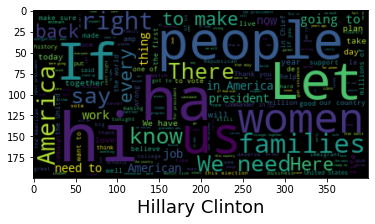

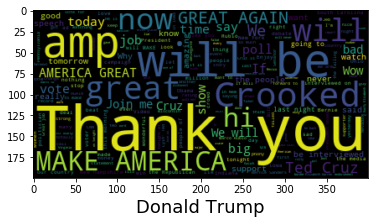

<IPython.core.display.Javascript object>

In [227]:
plt.imshow(wordcloud_clinton, interpolation="bilinear")
plt.xlabel("Hillary Clinton", fontsize=18)
plt.show()

plt.imshow(wordcloud_trump, interpolation="bilinear")
plt.xlabel("Donald Trump", fontsize=18)
plt.show()

# Topic modeling with LDA

some introduction ....

In [228]:
tweets_list = tweets["text"].tolist()
pprint(tweets_list[:5])

['The question in this election: Who can put the plans into action that will '
 'make your life better? https://t.co/XreEY9OicG',
 'Last night, Donald Trump said not paying taxes was "smart." You know what I '
 'call it? Unpatriotic. https://t.co/t0xmBfj7zF',
 "Couldn't be more proud of @HillaryClinton. Her vision and command during "
 "last night's debate showed that she's ready to be our next @POTUS.",
 "If we stand together, there's nothing we can't do. \n"
 '\n'
 "Make sure you're ready to vote: https://t.co/tTgeqxNqYm "
 'https://t.co/Q3Ymbb7UNy',
 "Both candidates were asked about how they'd confront racial injustice. Only "
 'one had a real answer. https://t.co/sjnEokckis']


<IPython.core.display.Javascript object>

In [229]:
from pprint import pprint

tweets_list_cleaned = [
    remove_hashtags_at_urls_newlins_emojis(tweets_list_i)
    for tweets_list_i in tweets_list
]
pprint(tweets_list_cleaned[:5])

['The question in this election: Who can put the plans into action that will '
 'make your life better? ',
 'Last night, Donald Trump said not paying taxes was "smart." You know what I '
 'call it? Unpatriotic. ',
 "Couldn't be more proud of Her vision and command during last night's debate "
 "showed that she's ready to be our next ",
 "If we stand together, there's nothing we can't do. Make sure you're ready to "
 'vote: ',
 "Both candidates were asked about how they'd confront racial injustice. Only "
 'one had a real answer. ']


<IPython.core.display.Javascript object>

In [230]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
docs = [
    tokenizer.tokenize(tweets_list_cleaned_i.lower())
    for tweets_list_cleaned_i in tweets_list_cleaned
]

docs = [[token for token in doc if not token.isnumeric()] for doc in docs]
docs[1]

['last',
 'night',
 'donald',
 'trump',
 'said',
 'not',
 'paying',
 'taxes',
 'was',
 'smart',
 'you',
 'know',
 'what',
 'i',
 'call',
 'it',
 'unpatriotic']

<IPython.core.display.Javascript object>

In [231]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
docs[1]

['last',
 'night',
 'donald',
 'trump',
 'said',
 'not',
 'paying',
 'tax',
 'wa',
 'smart',
 'you',
 'know',
 'what',
 'i',
 'call',
 'it',
 'unpatriotic']

<IPython.core.display.Javascript object>

In [232]:
from gensim.models import Phrases

bigram = Phrases(docs, min_count=10)
" ".join(bigram[docs[1]])

'last_night donald_trump said not paying tax wa smart you know what i call it unpatriotic'

<IPython.core.display.Javascript object>

In [233]:
# add bigrams into the sentence
for doc in docs:
    for token in bigram[doc]:
        if "_" in token:
            doc.append(token)
docs[1]

['last',
 'night',
 'donald',
 'trump',
 'said',
 'not',
 'paying',
 'tax',
 'wa',
 'smart',
 'you',
 'know',
 'what',
 'i',
 'call',
 'it',
 'unpatriotic',
 'last_night',
 'donald_trump']

<IPython.core.display.Javascript object>

In [234]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=3,no_above=0.04)


<IPython.core.display.Javascript object>

In [235]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print("Number of unique tokens: %d" % len(dictionary))
print("Number of documents: %d" % len(corpus))


Number of unique tokens: 2995
Number of documents: 6444


<IPython.core.display.Javascript object>

In [236]:
# LDA
from gensim.models import LdaModel

# num_topics = 7
chunksize=2000
passes=20
iterations=400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

# model = LdaModel(
#     corpus = corpus,
#     id2word = id2word,
#     chunksize=chunksize,
#     alpha='auto',
#     eta='auto',
#     iterations = iterations,
#     num_topics=num_topics,
#     passes=passes,
#     eval_every=eval_every
# )


<IPython.core.display.Javascript object>

In [437]:
avg_coherence = []
for num_topics in range(2, 11):
    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha="auto",
        eta="auto",
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
    )
    top_topics = model.top_topics(corpus, topn=10)
    avg_coherence.append(sum([t[1] for t in top_topics]) / num_topics)

<IPython.core.display.Javascript object>

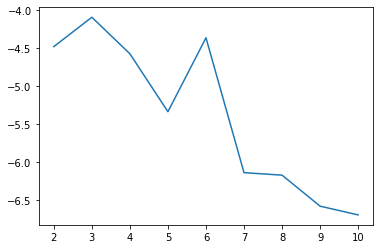

<IPython.core.display.Javascript object>

In [439]:
plt.plot(range(2, 11), avg_coherence)

In [440]:
num_topics = 3
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha="auto",
    eta="auto",
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
)
top_topics = model.top_topics(corpus, topn=10)
pprint(top_topics[0])
pprint(top_topics[1])
pprint(top_topics[2])

<IPython.core.display.Javascript object>

In [237]:
num_topics = 6
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha="auto",
    eta="auto",
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
)
top_topics = model.top_topics(corpus, topn=10)
for i in range(6):
    pprint(top_topics[i])

([(0.01282344, 'woman'),
  (0.01136708, 'her'),
  (0.010445317, 'am'),
  (0.010442935, 'should'),
  (0.010215069, 'many'),
  (0.0095406175, 'i_am'),
  (0.009274806, 'she'),
  (0.009093469, 'only'),
  (0.008282347, 'than'),
  (0.0079812, 'but')],
 -3.3034009654196077)
([(0.02778302, 'iowa'),
  (0.024728598, 'i_will'),
  (0.024082938, 'will_be'),
  (0.021891944, 'tonight'),
  (0.016447898, 'crowd'),
  (0.01548726, 'night'),
  (0.014579794, 'big'),
  (0.013023069, 'join'),
  (0.012703152, 'now'),
  (0.012153019, 'enjoy')],
 -4.41154278682534)
([(0.027403831, 'cruz'),
  (0.019137308, 'poll'),
  (0.016647121, 'ted'),
  (0.014061736, 'again'),
  (0.011882738, 'ted_cruz'),
  (0.011626618, 'want'),
  (0.011195653, 'vote'),
  (0.0103899455, 'make_america'),
  (0.01007531, 'great_again'),
  (0.009751498, 'like')],
 -5.58663580830123)
([(0.024973448, 'let'),
  (0.014374421, 'don'),
  (0.013057018, 'don_t'),
  (0.011749552, 'obama'),
  (0.010728721, 'together'),
  (0.0101790745, 'let_s'),
  (0.007

<IPython.core.display.Javascript object>

some analysis ..........

# BERT

play with BERT, introduction ...

### sentiment analysis

In [447]:
original_tweets_cleaned_with_emojis = {
    key: remove_hashtags_at_urls_newlins(value)
    for key, value in original_tweets.items()
}

<IPython.core.display.Javascript object>

In [19]:
import tqdm


def nop(it, *a, **k):
    return it


tqdm.tqdm = nop

import transformers
from transformers import pipeline

<IPython.core.display.Javascript object>

In [465]:
nlp = pipeline("sentiment-analysis")
for i in range(5):
    sent = remove_urls(tweets_list[i])
    print(f"Sentence {i}: ", repr(sent))
    results = nlp(sent)
    print(f"Sentiment: {results}\n")

Sentence 0:  'The question in this election: Who can put the plans into action that will make your life better? '
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9982404112815857}]

Sentence 1:  'Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. '
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9982924461364746}]

Sentence 2:  "Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS."
Sentiment: [{'label': 'POSITIVE', 'score': 0.9983018636703491}]

Sentence 3:  "If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote:  "
Sentiment: [{'label': 'POSITIVE', 'score': 0.9971059560775757}]

Sentence 4:  "Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. "
Sentiment: [{'label': 'NEGATIVE', 'score': 0.9957852959632874}]



<IPython.core.display.Javascript object>

In [479]:
results[0]["score"]

0.9957852959632874

<IPython.core.display.Javascript object>

In [481]:
# overall sentiment for Donald Trump and Hillary Clinton
def avg_sentiment_score(name="HillaryClinton"):
    all_tweets = tweets[tweets.handle == name].text.tolist()
    return sum(nlp(remove_urls(tweet))[0]["score"] for tweet in all_tweets) / len(
        all_tweets
    )

<IPython.core.display.Javascript object>

In [482]:
print(avg_sentiment_score("HillaryClinton"))

0.9542036409601246


<IPython.core.display.Javascript object>

In [483]:
print(avg_sentiment_score("realDonaldTrump"))

0.9728199485631519


<IPython.core.display.Javascript object>

### question answering

In [20]:
nlp = pipeline(
    "question-answering",
    model="deepset/bert-large-uncased-whole-word-masking-squad2",
    tokenizer="deepset/bert-large-uncased-whole-word-masking-squad2",
)

<IPython.core.display.Javascript object>

In [25]:
from pprint import pprint


context = remove_urls(original_tweets["HillaryClinton"])[:1000]
pprint(nlp(question="How to make America great again?", context=context))
print('')
context = remove_urls(original_tweets["HillaryClinton"])[:10000]
pprint(nlp(question="How to make America great again?", context=context))
# see 'answer' part

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 5991.86it/s]


{'answer': "If we stand together, there's nothing we can't do.",
 'end': 151,
 'score': 0.17023356088848018,
 'start': 99}



add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 2362.99it/s]


{'answer': 'the middle class.”',
 'end': 2624,
 'score': 0.392003919371664,
 'start': 2606}


In [132]:
context = remove_urls(original_tweets["realDonaldTrump"])[:1000]
pprint(nlp(question="How to make America great again?", context=context))
print("")
context = remove_urls(original_tweets["realDonaldTrump"])[:10000]
pprint(nlp(question="How to make America great again?", context=context))

{'answer': 'Once again, we will have a government of, by and for the people.',
 'end': 161,
 'score': 0.017035918376771538,
 'start': 97}

{'answer': 'Lets MAKE AMERICA SAFE AND GREAT AGAIN with the American people.',
 'end': 2332,
 'score': 0.3592243888834198,
 'start': 2267}


<IPython.core.display.Javascript object>

### Text generation

In [25]:
from transformers import AutoModelWithLMHead, AutoTokenizer

model = AutoModelWithLMHead.from_pretrained("xlnet-base-cased")
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

<IPython.core.display.Javascript object>

In [26]:
PADDING_TEXT = remove_urls(original_tweets["HillaryClinton"])[:2000] + " <eod></s><eos>"
prompt = "If I am elected president of the United States, I would "
inputs = tokenizer.encode(
    PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="pt"
)

prompt_length = len(
    tokenizer.decode(
        inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
)
outputs = model.generate(inputs, max_length=600, do_sample=True, top_p=0.9, top_k=50)
pprint(
    "Hillary Clinton: "
    + tokenizer.decode(outputs[0])[
        re.search(prompt, tokenizer.decode(outputs[0])).span(0)[0] :
    ]
)

<IPython.core.display.Javascript object>

In [32]:
PADDING_TEXT = (
    remove_urls(original_tweets["realDonaldTrump"])[:2000] + " <eod></s><eos>"
)
prompt = "If I am elected president of the United States, I would "
inputs = tokenizer.encode(
    PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="pt"
)

prompt_length = len(
    tokenizer.decode(
        inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
)
outputs = model.generate(inputs, max_length=600, do_sample=True, top_p=0.9, top_k=50)
pprint(
    "Donald Trump: "
    + tokenizer.decode(outputs[0])[
        re.search(prompt, tokenizer.decode(outputs[0])).span(0)[0] :
    ]
)

('Donald Trump: If I am elected president of the United States, I would like '
 'to have an independent judiciary................')


<IPython.core.display.Javascript object>

### Summarization

In [174]:
from transformers import pipeline

summarizer = pipeline("summarization")
pprint(
    summarizer(
        remove_urls(original_tweets["realDonaldTrump"])[:2000],
        max_length=300,
        min_length=30,
        do_sample=False,
    )
)


[{'summary_text': ' The #1 trend on Twitter right now is #TrumpWon - thank '
                  'you! I won every poll from last nights Presidential Debate '
                  '- except for the little watched @CNN poll . Join me for a '
                  '3pm rally - tomorrow at the Mid-America Center in Council '
                  'Bluffs, Iowa!'}]


<IPython.core.display.Javascript object>

In [175]:
pprint(
    summarizer(
        remove_urls(original_tweets["HillaryClinton"])[:2000],
        max_length=300,
        min_length=30,
        do_sample=False,
    )
)

[{'summary_text': ' Donald Trump lied to the American people at least 58 times '
                  "during the first presidential debate . It's "
                  '#NationalVoterRegistrationDay . Join Hillary live in NC for '
                  'her first rally since winning the debate .'}]


<IPython.core.display.Javascript object>

# spacy

play with spaCy ...